In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # For the Random Forest model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model performance
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import StandardScaler  # For feature scaling

In [2]:
data = pd.read_csv('Lagos Historical data.csv')

In [3]:
data.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase
0,2019-07-01,27.5,25.0,25.7,30.9,25.0,26.4,24.3,92.3,26.0,...,225.9,1014.3,58.3,8.4,193.8,16.7,7,2019-07-01 06:35:33,2019-07-01 19:04:59,0.96
1,2019-07-02,31.0,24.0,26.5,39.1,24.0,28.8,24.5,89.1,0.0,...,236.7,1012.4,68.1,9.1,201.2,17.4,7,2019-07-02 06:35:47,2019-07-02 19:05:08,0.00
2,2019-07-03,30.0,24.8,26.9,36.8,24.8,29.4,24.7,88.0,0.7,...,220.5,1012.5,54.8,9.4,202.8,17.6,7,2019-07-03 06:36:00,2019-07-03 19:05:17,0.02
3,2019-07-04,27.3,25.0,25.8,31.2,25.0,26.4,25.0,95.2,8.0,...,237.6,1013.5,61.0,8.6,112.3,9.8,4,2019-07-04 06:36:14,2019-07-04 19:05:25,0.06
4,2019-07-05,28.0,25.0,25.8,32.7,25.0,26.7,24.8,94.3,3.0,...,246.8,1014.6,64.6,8.8,124.2,10.7,5,2019-07-05 06:36:28,2019-07-05 19:05:32,0.09


In [4]:
# Convert 'datetime' column to datetime type and extract temporal features
data['datetime'] = pd.to_datetime(data['datetime'])
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['dayofweek'] = data['datetime'].dt.dayofweek

# Check for missing values

In [5]:
data.isnull().sum()

datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          629
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            4
solarradiation        0
solarenergy           0
uvindex               0
sunrise               0
sunset                0
moonphase             0
month                 0
day                   0
dayofweek             0
dtype: int64

In [6]:
# Impute missing values in 'visibility' with the median
data['visibility'].fillna(data['visibility'].median(), inplace=True)

# Encode 'preciptype' using one-hot encoding
data = pd.get_dummies(data, columns=['preciptype'], drop_first=True)

# Verify that there are no more missing values
missing_values_after_imputation = data.isnull().sum()

# Display the first few rows of the processed data to check the new features
data.head()


,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month,day,dayofweek
0,2019-07-01,27.5,25.0,25.7,30.9,25.0,26.4,24.3,92.3,26.0,...,8.4,193.8,16.7,7,2019-07-01 06:35:33,2019-07-01 19:04:59,0.96,7,1,0
1,2019-07-02,31.0,24.0,26.5,39.1,24.0,28.8,24.5,89.1,0.0,...,9.1,201.2,17.4,7,2019-07-02 06:35:47,2019-07-02 19:05:08,0.00,7,2,1
2,2019-07-03,30.0,24.8,26.9,36.8,24.8,29.4,24.7,88.0,0.7,...,9.4,202.8,17.6,7,2019-07-03 06:36:00,2019-07-03 19:05:17,0.02,7,3,2
3,2019-07-04,27.3,25.0,25.8,31.2,25.0,26.4,25.0,95.2,8.0,...,8.6,112.3,9.8,4,2019-07-04 06:36:14,2019-07-04 19:05:25,0.06,7,4,3
4,2019-07-05,28.0,25.0,25.8,32.7,25.0,26.7,24.8,94.3,3.0,...,8.8,124.2,10.7,5,2019-07-05 06:36:28,2019-07-05 19:05:32,0.09,7,5,4


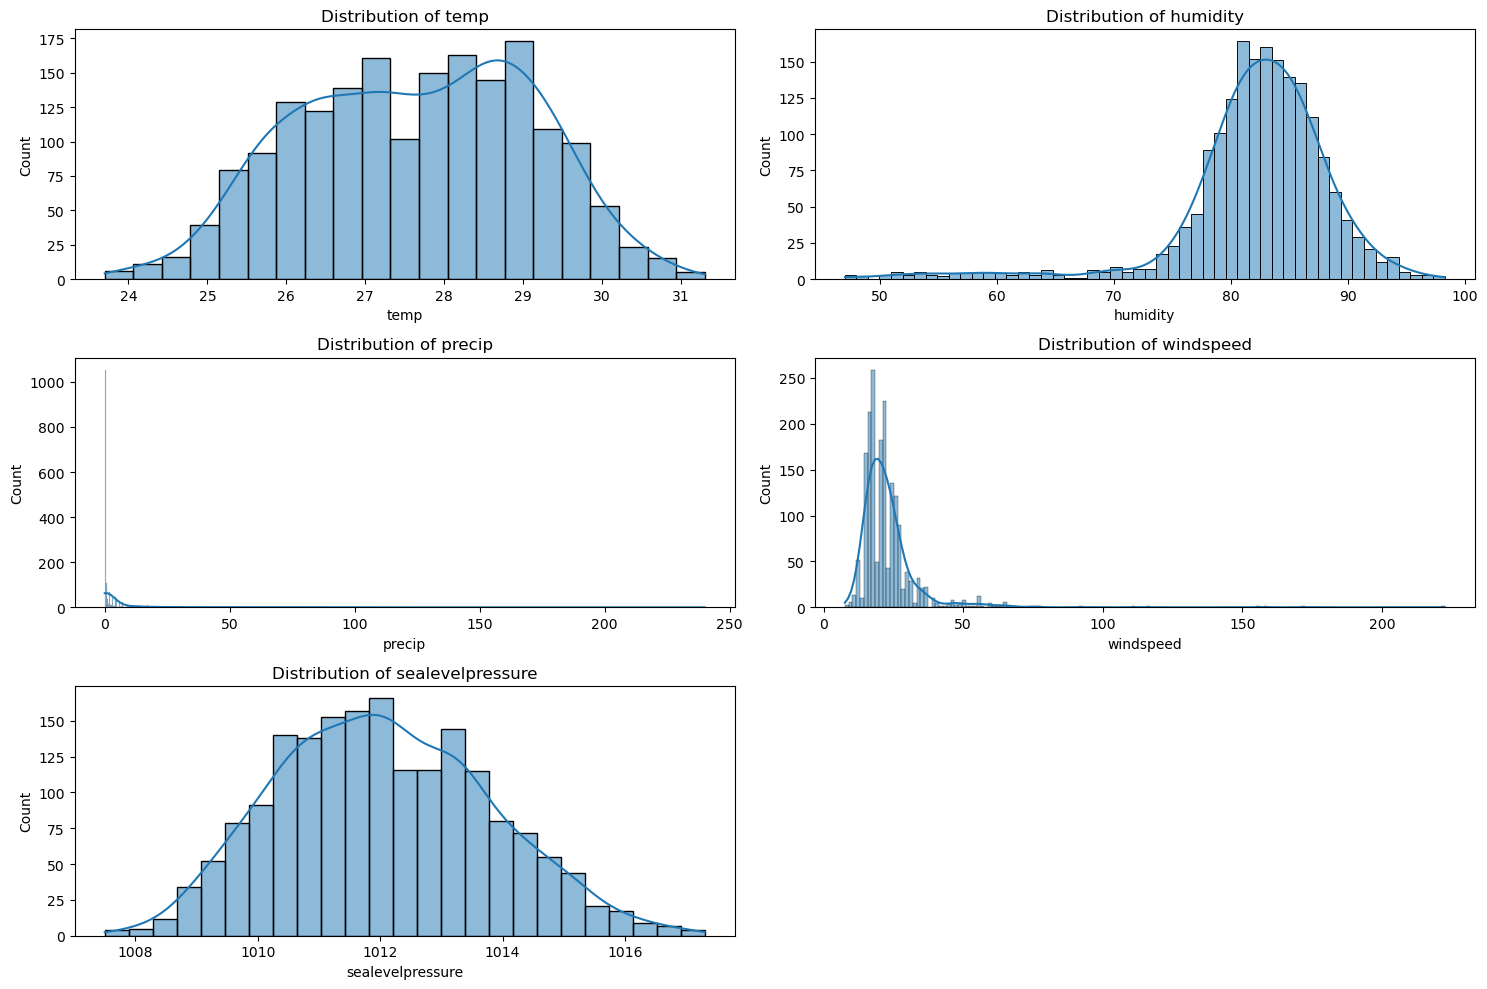

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of key features
key_features = ['temp', 'humidity', 'precip', 'windspeed', 'sealevelpressure']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

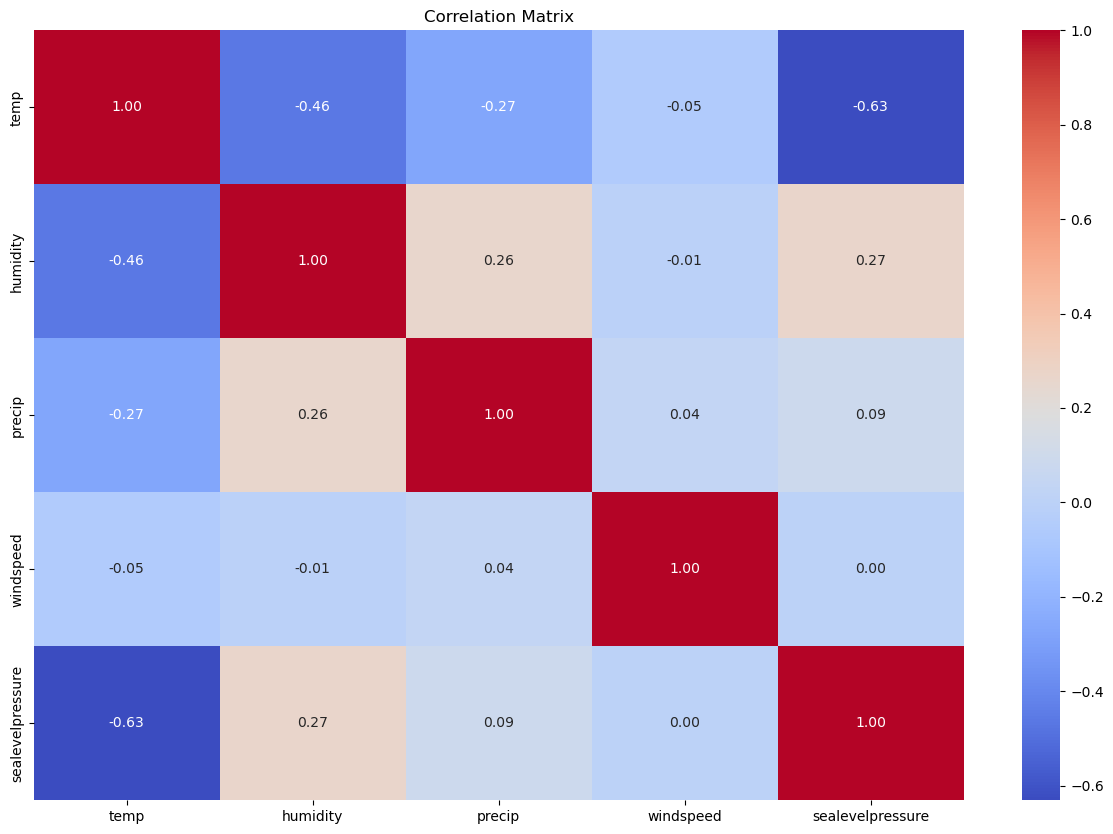

In [9]:
# Plot correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data[key_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
data.isnull().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
sunrise             0
sunset              0
moonphase           0
month               0
day                 0
dayofweek           0
dtype: int64

In [11]:
data['precip_lag1'] = data['precip'].shift(1)  # Create a new feature that is the precipitation value from the previous day
data.dropna(inplace=True)  # Remove rows with missing values that resulted from the lagging operation

In [12]:
Columns = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
            'humidity','precip','precipprob', 'precipcover', 'windgust', 'windspeed', 'winddir',
           'sealevelpressure','cloudcover','visibility','solarradiation','solarenergy', 'uvindex']

In [13]:
X = data[Columns]  # Select the features (all columns listed in the Column variable)
y = data['precip']  # The target variable is 'precip'

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# Split the data into training and testing sets, with 30% of the data reserved for testing

In [15]:
scaler = StandardScaler()  # Create a StandardScaler object for feature scaling
X_train = scaler.fit_transform(X_train)  # Fit the scaler on the training data and transform it
X_test = scaler.transform(X_test)  # Transform the test data using the fitted scaler

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Create a Random Forest Regressor with 100 trees
model.fit(X_train, y_train)  # Train the model on the training data

RandomForestRegressor(random_state=42)

In [17]:
y_pred_train = model.predict(X_train)  # Predict on the training data
y_pred_test = model.predict(X_test)  # Predict on the testing data

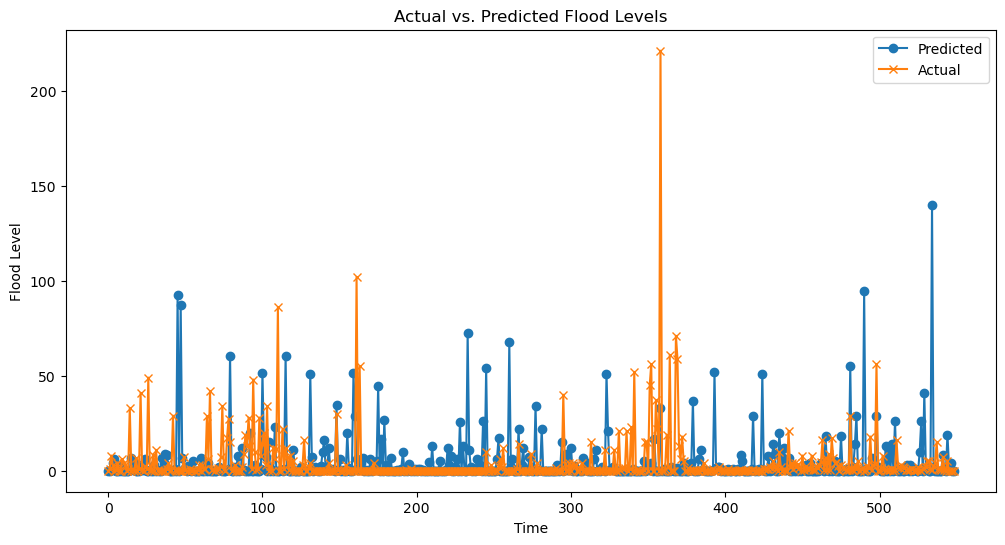

In [30]:
# Compare actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_pred_test)), y_pred_test  , label='Predicted', marker='o')
plt.plot(range(len(y_pred_test)), data['precip'][:len(y_pred_test)], label='Actual', marker='x')
plt.legend()
plt.title('Actual vs. Predicted Flood Levels')
plt.xlabel('Time')
plt.ylabel('Flood Level')
plt.show()

In [19]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))  # Calculate the Root Mean Squared Error for training data
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))  # Calculate the Root Mean Squared Error for testing data
train_r2 = r2_score(y_train, y_pred_train)  # Calculate the R^2 score for training data
test_r2 = r2_score(y_test, y_pred_test)  # Calculate the R^2 score for testing data

print(f'Train RMSE: {train_rmse}, Train R2: {train_r2}')  # Print training metrics
print(f'Test RMSE: {test_rmse}, Test R2: {test_r2}')  # Print testing metrics

Train RMSE: 1.6471616229678205, Train R2: 0.9873930492842597
Test RMSE: 3.5179628745746085, Test R2: 0.9450191452085612


In [20]:
import joblib  # Import joblib for saving the model
joblib.dump(model, 'random_forest_flood_predictor.pkl')  # Save the trained model to a file

['random_forest_flood_predictor.pkl']

In [21]:
new_data = pd.read_csv('Lagos Weather Forcast.csv') #import new data to be used for the prediction

In [22]:
#Take similar preprocessing steps as the training data
data['datetime'] = pd.to_datetime(data['datetime'])
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['dayofweek'] = data['datetime'].dt.dayofweek

In [23]:
new_data.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase
0,2024-07-04,30.0,24.0,26.4,36.1,24.0,28.1,24.0,86.9,9.5,...,233.3,1014.0,45.0,11.8,174.3,15.0,6,2024-07-04T06:36:28,2024-07-04T19:05:34,0.95
1,2024-07-05,27.9,25.1,26.7,31.1,25.1,28.3,23.0,80.6,5.4,...,236.1,1013.3,69.2,22.4,269.5,23.3,9,2024-07-05T06:36:42,2024-07-05T19:05:41,0.00
2,2024-07-06,26.8,24.5,25.4,29.2,24.5,25.6,22.8,85.7,17.9,...,246.2,1013.5,99.9,15.5,23.1,2.1,1,2024-07-06T06:36:55,2024-07-06T19:05:48,0.02
3,2024-07-07,27.1,25.2,26.3,29.6,25.2,27.4,22.7,80.3,5.4,...,240.2,1012.6,97.8,22.5,227.6,19.7,9,2024-07-07T06:37:08,2024-07-07T19:05:54,0.05
4,2024-07-08,26.8,25.1,26.1,29.2,25.1,26.5,23.0,83.0,27.5,...,244.1,1012.6,99.2,15.2,140.4,12.3,6,2024-07-08T06:37:21,2024-07-08T19:05:59,0.08


In [24]:
new_data.isnull().sum() # check for null values

datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
sunrise             0
sunset              0
moonphase           0
dtype: int64

In [25]:
new_data['precip_lag1'] = data['precip'].shift(1)  # Create a new feature that is the precipitation value from the previous day
new_data.dropna(inplace=True)  # Remove rows with missing values that resulted from the lagging operation

In [26]:
data_predictions = new_data[Columns].values 
# convert it to an array as the data used for the training waa converted to an array before training

In [27]:
loaded_model = joblib.load('random_forest_flood_predictor.pkl')  # Load the saved model from the file
new_predictions = loaded_model.predict(data_predictions)  # Predict using the loaded model on new data

In [28]:
print("Predictions:", new_predictions)

Predictions: [174.74  125.54  174.74  174.74  174.74  174.74   62.77   64.233  20.957
   7.909  15.066  57.11   10.784]
